In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # import decision tree classifier
from sklearn.model_selection import train_test_split # import train_test_split function
from sklearn import metrics
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/Research/E-waste data set.xlsx"
df = pd.read_excel(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
col_names = ['Timestamp','District','Gender','Age','Educational_Level','Income_LevelM','Ewaste_Awareness','If_yes','Policy_Awareness','Life_Expect_AC',
             'Life_Expect_Lap','Life_Expect_LED','Life_Expect_Washing_Machine','Life_Expect_Cal','Life_Expect_Mobile','Reasons_discard_EOL',
             'Reasons_discard_TechObs','Reasons_discard_RepairCost','Reasons_discard_InabRepair','Reasons_discard_Update','Reasons_discard_Other',
             'Still_Usable_GenWaste','Still_Usable_OutCombus','Still_Usable_RecyCent','Still_Usable_SaleScrapMetal','Still_Usable_Resale','Still_Usable_Reuse',
             'Still_Usable_Other','Broken_EEE_GenWaste','Broken_EEE_OutCombus','Broken_EEE_RecyCent','Broken_EEE_Repair','Broken_EEE_SaleScrapMetal',
             'Broken_EEE_Resale','Broken_EEE_StoreHome','Broken_EEE_Other','Awareness_EWaste_Center','Preferable_Method_to_Dispose_EWaste',
             'IF_not_Y','WTE_frige','WTE_TV','WTE_LED','WTE_Printer','WTE_vedio_cam','WTE_Land_Phone',
             'Satisfaction_Current_EWaste_Mngt','Caring_Convinence','Responsible_Party','Believe_adverse_effect_EWaste_Human',
             'Believe_adverse_effect_EWaste_Env','Need_for_Further_Awareness','WTP_for_Effective_Ewaste_Disposal']
df = df.set_axis(col_names, axis=1, inplace=False)

In [ ]:
df.pop('Timestamp')

0     2021-12-11 11:10:55.108
1     2021-12-11 12:35:42.333
2     2021-12-11 13:34:23.102
3     2021-12-11 14:23:59.835
4     2021-12-13 18:56:34.426
                ...          
722   2022-01-28 15:21:09.000
723   2022-01-28 13:38:54.000
724   2022-01-28 18:01:42.000
725   2022-01-29 16:46:47.000
726   2022-01-29 06:55:50.000
Name: Timestamp, Length: 727, dtype: datetime64[ns]

In [ ]:
df.head()

,District,Gender,Age,Educational_Level,Income_LevelM,Ewaste_Awareness,If_yes,Policy_Awareness,Life_Expect_AC,Life_Expect_Lap,...,WTE_Printer,WTE_vedio_cam,WTE_Land_Phone,Satisfaction_Current_EWaste_Mngt,Caring_Convinence,Responsible_Party,Believe_adverse_effect_EWaste_Human,Believe_adverse_effect_EWaste_Env,Need_for_Further_Awareness,WTP_for_Effective_Ewaste_Disposal
0,Ratnapura,Male,35,Graduate,"120,000 - 150,000",Yes,"Cell phones, Televisions, Refrigerators, LED b...",Yes,4 years or more,4 years or more,...,No,No,No,Normal,Usually concerned,Yourself,Strongly agrees,Strongly agrees,Yes,Yes
1,Gampaha,Male,31,Diploma,"60,000 - 90,000",Yes,"Cell phones, Televisions, Refrigerators, LED b...",No,4 years or more,3 years,...,Yes,Yes,No,Dissatisfied,Usually concerned,"Yourself, The government, Manufacturers",Strongly agrees,Strongly agrees,Yes,No
2,Colombo,Male,33,Graduate,"120,000 - 150,000",Yes,"Cell phones, Televisions, Refrigerators, LED b...",No,3 years,3 years,...,Yes,Yes,Yes,Dissatisfied,Is somewhat concerned,"Yourself, The government, Manufacturers",Agree to some extent,Agree to some extent,Yes,Yes
3,Colombo,Male,32,Graduate,"90,000 - 120,000",Yes,"Cell phones, Televisions, Refrigerators, LED b...",No,4 years or more,3 years,...,Yes,No,Yes,Normal,Is concerned,"Yourself, The government",Strongly agrees,Strongly agrees,Yes,Yes
4,Puttalam,Male,25,Diploma,"30,000 - 60,000",Yes,"Paper, Computer, Furniture, Mobile phone",Yes,4 years or more,4 years or more,...,Yes,Yes,Yes,Strongly dissatisfied,Is concerned,"Yourself, The government, Manufacturers",Agree,Strongly agrees,Yes,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 51 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   District                             727 non-null    object
 1   Gender                               727 non-null    object
 2   Age                                  727 non-null    int64 
 3   Educational_Level                    727 non-null    object
 4   Income_LevelM                        727 non-null    object
 5   Ewaste_Awareness                     727 non-null    object
 6   If_yes                               492 non-null    object
 7   Policy_Awareness                     727 non-null    object
 8   Life_Expect_AC                       727 non-null    object
 9   Life_Expect_Lap                      727 non-null    object
 10  Life_Expect_LED                      727 non-null    object
 11  Life_Expect_Washing_Machine          727 non-

In [ ]:
df.isnull().sum()

District                                 0
Gender                                   0
Age                                      0
Educational_Level                        0
Income_LevelM                            0
Ewaste_Awareness                         0
If_yes                                 235
Policy_Awareness                         0
Life_Expect_AC                           0
Life_Expect_Lap                          0
Life_Expect_LED                          0
Life_Expect_Washing_Machine              0
Life_Expect_Cal                          0
Life_Expect_Mobile                       0
Reasons_discard_EOL                    225
Reasons_discard_TechObs                357
Reasons_discard_RepairCost             373
Reasons_discard_InabRepair             325
Reasons_discard_Update                 560
Reasons_discard_Other                  722
Still_Usable_GenWaste                  568
Still_Usable_OutCombus                 670
Still_Usable_RecyCent                  543
Still_Usabl

In [ ]:
ewaste_df = df.drop(["If_yes", "IF_not_Y"], axis=1)
ewaste_df.head()

,District,Gender,Age,Educational_Level,Income_LevelM,Ewaste_Awareness,Policy_Awareness,Life_Expect_AC,Life_Expect_Lap,Life_Expect_LED,...,WTE_Printer,WTE_vedio_cam,WTE_Land_Phone,Satisfaction_Current_EWaste_Mngt,Caring_Convinence,Responsible_Party,Believe_adverse_effect_EWaste_Human,Believe_adverse_effect_EWaste_Env,Need_for_Further_Awareness,WTP_for_Effective_Ewaste_Disposal
0,Ratnapura,Male,35,Graduate,"120,000 - 150,000",Yes,Yes,4 years or more,4 years or more,2 years,...,No,No,No,Normal,Usually concerned,Yourself,Strongly agrees,Strongly agrees,Yes,Yes
1,Gampaha,Male,31,Diploma,"60,000 - 90,000",Yes,No,4 years or more,3 years,1 year,...,Yes,Yes,No,Dissatisfied,Usually concerned,"Yourself, The government, Manufacturers",Strongly agrees,Strongly agrees,Yes,No
2,Colombo,Male,33,Graduate,"120,000 - 150,000",Yes,No,3 years,3 years,1 year,...,Yes,Yes,Yes,Dissatisfied,Is somewhat concerned,"Yourself, The government, Manufacturers",Agree to some extent,Agree to some extent,Yes,Yes
3,Colombo,Male,32,Graduate,"90,000 - 120,000",Yes,No,4 years or more,3 years,2 years,...,Yes,No,Yes,Normal,Is concerned,"Yourself, The government",Strongly agrees,Strongly agrees,Yes,Yes
4,Puttalam,Male,25,Diploma,"30,000 - 60,000",Yes,Yes,4 years or more,4 years or more,4 years or more,...,Yes,Yes,Yes,Strongly dissatisfied,Is concerned,"Yourself, The government, Manufacturers",Agree,Strongly agrees,Yes,No


In [ ]:
ewaste_df.isnull().sum()

District                                 0
Gender                                   0
Age                                      0
Educational_Level                        0
Income_LevelM                            0
Ewaste_Awareness                         0
Policy_Awareness                         0
Life_Expect_AC                           0
Life_Expect_Lap                          0
Life_Expect_LED                          0
Life_Expect_Washing_Machine              0
Life_Expect_Cal                          0
Life_Expect_Mobile                       0
Reasons_discard_EOL                    225
Reasons_discard_TechObs                357
Reasons_discard_RepairCost             373
Reasons_discard_InabRepair             325
Reasons_discard_Update                 560
Reasons_discard_Other                  722
Still_Usable_GenWaste                  568
Still_Usable_OutCombus                 670
Still_Usable_RecyCent                  543
Still_Usable_SaleScrapMetal            415
Still_Usabl

In [ ]:
ewaste_df['Income_LevelM'].unique()

array(['120,000 - 150,000', '60,000 - 90,000', '90,000 - 120,000',
       '30,000 - 60,000', '150,000 or more', 'Do not earn income yet',
       'Less than 30,000'], dtype=object)

In [ ]:
ewaste_df['Life_Expect_AC'].unique()

array(['4 years or more', '3 years', '1 year', '2 years'], dtype=object)

In [ ]:
ewaste_df['Awareness_EWaste_Center'].unique()

array(['Yes', 'Not aware', 'No'], dtype=object)

In [ ]:
ewaste_df['Preferable_Method_to_Dispose_EWaste'].unique()

array(['Come home and collect', 'Handing over to an intermediary',
       'Taken to a recycling center and handed over'], dtype=object)

In [ ]:
ewaste_df['Satisfaction_Current_EWaste_Mngt'].unique()

array(['Normal', 'Dissatisfied', 'Strongly dissatisfied',
       'Strongly satisfied', 'Satisfied'], dtype=object)

In [ ]:
ewaste_df['Caring_Convinence'].unique()

array(['Usually concerned', 'Is somewhat concerned', 'Is concerned',
       'Does not care', 'Definitely care'], dtype=object)

In [ ]:
ewaste_df['Believe_adverse_effect_EWaste_Human'].unique()

array(['Strongly agrees', 'Agree to some extent', 'Agree', 'Do not agree',
       'Strongly disagree'], dtype=object)

In [ ]:
ewaste_df.replace({'Income_LevelM': {'Do not earn income yet':1, 'Less than 30,000':2, '30,000 - 60,000':3, '60,000 - 90,000':4, '90,000 - 120,000':5, '120,000 - 150,000':6, '150,000 or more':7},
                   'Life_Expect_AC': {'4 years or more':4, '3 years':3, '1 year':1, '2 years':2},
                   'Life_Expect_Lap': {'4 years or more':4, '3 years':3, '1 year':1, '2 years':2},
                   'Life_Expect_LED': {'4 years or more':4, '3 years':3, '1 year':1, '2 years':2},
                   'Life_Expect_Washing_Machine': {'4 years or more':4, '3 years':3, '1 year':1, '2 years':2},
                  'Life_Expect_Cal': {'4 years or more':4, '3 years':3, '1 year':1, '2 years':2},
                  'Life_Expect_Mobile': {'4 years or more':4, '3 years':3, '1 year':1, '2 years':2},
                  'Awareness_EWaste_Center': {'Yes':1, 'Not aware':0, 'No':-1},
                  'Preferable_Method_to_Dispose_EWaste': {'Come home and collect':1,'Handing over to an intermediary':2,'Taken to a recycling center and handed over':3}, 
                  'Satisfaction_Current_EWaste_Mngt': {'Strongly satisfied':5,'Satisfied':4,'Normal':3,'Dissatisfied':2,'Strongly dissatisfied':1},
                  'Caring_Convinence': {'Does not care':5,'Is somewhat concerned':4,'Usually concerned':3,'Is concerned':2,'Definitely care':1},
                  'Believe_adverse_effect_EWaste_Human': {'Strongly agrees':5,'Agree':4,'Agree to some extent':3,'Do not agree':2,'Strongly disagree':1},
                  'Believe_adverse_effect_EWaste_Env': {'Strongly agrees':5,'Agree':4,'Agree to some extent':3,'Do not agree':2,'Strongly disagree':1}},
                  inplace=True)

In [ ]:
ewaste_data=pd.get_dummies(ewaste_df, columns=['District','Gender','Educational_Level','Ewaste_Awareness','Policy_Awareness',
                                       'Reasons_discard_EOL','Reasons_discard_TechObs','Reasons_discard_RepairCost','Reasons_discard_InabRepair',
                                       'Reasons_discard_Update','Reasons_discard_Other','Still_Usable_GenWaste','Still_Usable_OutCombus','Still_Usable_RecyCent',
                                       'Still_Usable_SaleScrapMetal','Still_Usable_Resale','Still_Usable_Reuse','Still_Usable_Other','Broken_EEE_GenWaste',
                                       'Broken_EEE_OutCombus','Broken_EEE_RecyCent','Broken_EEE_Repair','Broken_EEE_SaleScrapMetal','Broken_EEE_Resale',
                                       'Broken_EEE_StoreHome','Broken_EEE_Other','WTE_frige','WTE_TV','WTE_LED','WTE_Printer','WTE_vedio_cam','WTE_Land_Phone',
                                       'Responsible_Party','Need_for_Further_Awareness','WTP_for_Effective_Ewaste_Disposal'],drop_first=True)
ewaste_data

,Age,Income_LevelM,Life_Expect_AC,Life_Expect_Lap,Life_Expect_LED,Life_Expect_Washing_Machine,Life_Expect_Cal,Life_Expect_Mobile,Awareness_EWaste_Center,Preferable_Method_to_Dispose_EWaste,...,WTE_vedio_cam_Yes,WTE_Land_Phone_Yes,Responsible_Party_The government,"Responsible_Party_The government, Manufacturers",Responsible_Party_Yourself,"Responsible_Party_Yourself, Manufacturers","Responsible_Party_Yourself, The government","Responsible_Party_Yourself, The government, Manufacturers",Need_for_Further_Awareness_Yes,WTP_for_Effective_Ewaste_Disposal_Yes
0,35,6,4,4,2,4,4,4,1,1,...,0,0,0,0,1,0,0,0,1,1
1,31,4,4,3,1,4,1,1,1,1,...,1,0,0,0,0,0,0,1,1,0
2,33,6,3,3,1,3,1,2,0,1,...,1,1,0,0,0,0,0,1,1,1
3,32,5,4,3,2,4,4,2,1,1,...,0,1,0,0,0,0,1,0,1,1
4,25,3,4,4,4,4,4,4,-1,2,...,1,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,27,3,1,3,3,4,4,4,-1,2,...,0,0,1,0,0,0,0,0,1,0
723,35,1,2,2,2,2,2,2,0,2,...,0,0,1,0,0,0,0,0,1,0
724,35,3,2,1,2,2,1,2,1,3,...,0,0,1,0,0,0,0,0,1,1
725,21,2,1,2,1,1,1,2,-1,1,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
ewaste_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 87 columns):
 #   Column                                                      Non-Null Count  Dtype
---  ------                                                      --------------  -----
 0   Age                                                         727 non-null    int64
 1   Income_LevelM                                               727 non-null    int64
 2   Life_Expect_AC                                              727 non-null    int64
 3   Life_Expect_Lap                                             727 non-null    int64
 4   Life_Expect_LED                                             727 non-null    int64
 5   Life_Expect_Washing_Machine                                 727 non-null    int64
 6   Life_Expect_Cal                                             727 non-null    int64
 7   Life_Expect_Mobile                                          727 non-null    int64
 8   Awareness_EWaste_Cen

In [ ]:
ewaste_data.to_csv('sample.csv', encoding='utf-8-sig')
files.download('sample.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Feature Selection**

In [ ]:
ewaste_dataST = StandardScaler().fit_transform(ewaste_data)
ewaste_dataST

array([[ 0.68168615,  2.62543867,  0.58319963, ..., -0.66087737,
         0.44018208,  0.84535356],
       [ 0.29713846,  1.29811328,  0.58319963, ...,  1.51314003,
         0.44018208, -1.18293699],
       [ 0.48941231,  2.62543867, -0.55654803, ...,  1.51314003,
         0.44018208,  0.84535356],
       ...,
       [ 0.68168615,  0.63445058, -1.6962957 , ..., -0.66087737,
         0.44018208,  0.84535356],
       [-0.66423075, -0.02921211, -2.83604336, ..., -0.66087737,
         0.44018208, -1.18293699],
       [-0.37581999, -0.69287481, -0.55654803, ..., -0.66087737,
         0.44018208, -1.18293699]])

In [ ]:
X=ewaste_dataST[:,:86]
Y=ewaste_dataST[:,86]

In [ ]:
pc=PCA(n_components=86)

In [ ]:
pc.fit(X)

PCA(n_components=86)

In [ ]:
pc.explained_variance_

array([5.04240680e+00, 3.33230862e+00, 2.43978282e+00, 2.38158810e+00,
       2.21438413e+00, 2.12822021e+00, 1.94250494e+00, 1.83759522e+00,
       1.64363984e+00, 1.55918832e+00, 1.54713467e+00, 1.47609483e+00,
       1.45664930e+00, 1.45347596e+00, 1.40263604e+00, 1.35864051e+00,
       1.33480831e+00, 1.32201273e+00, 1.28709043e+00, 1.26510070e+00,
       1.22904128e+00, 1.21926666e+00, 1.21713803e+00, 1.19545820e+00,
       1.18027440e+00, 1.13982091e+00, 1.13470081e+00, 1.11465636e+00,
       1.11083581e+00, 1.07116250e+00, 1.05660399e+00, 1.05191983e+00,
       1.04467964e+00, 1.03222350e+00, 1.02656596e+00, 1.02496284e+00,
       1.01859628e+00, 9.98489701e-01, 9.92729674e-01, 9.84764931e-01,
       9.78263305e-01, 9.59432308e-01, 9.46270344e-01, 9.27260725e-01,
       9.22014370e-01, 9.12143724e-01, 9.06404065e-01, 8.84519485e-01,
       8.71231381e-01, 8.49682479e-01, 8.29749064e-01, 8.17574246e-01,
       7.97624769e-01, 7.91766216e-01, 7.60183880e-01, 7.57340519e-01,
      

In [ ]:
pc.explained_variance_ratio_

array([5.85519871e-02, 3.86944765e-02, 2.83305449e-02, 2.76547929e-02,
       2.57132349e-02, 2.47127071e-02, 2.25561976e-02, 2.13379951e-02,
       1.90858022e-02, 1.81051585e-02, 1.79651926e-02, 1.71402841e-02,
       1.69144844e-02, 1.68776358e-02, 1.62872871e-02, 1.57764149e-02,
       1.54996774e-02, 1.53510963e-02, 1.49455816e-02, 1.46902388e-02,
       1.42715200e-02, 1.41580179e-02, 1.41333004e-02, 1.38815561e-02,
       1.37052431e-02, 1.32355007e-02, 1.31760467e-02, 1.29432923e-02,
       1.28989283e-02, 1.24382453e-02, 1.22691931e-02, 1.22148011e-02,
       1.21307287e-02, 1.19860891e-02, 1.19203943e-02, 1.19017789e-02,
       1.18278509e-02, 1.15943751e-02, 1.15274902e-02, 1.14350043e-02,
       1.13595080e-02, 1.11408441e-02, 1.09880085e-02, 1.07672705e-02,
       1.07063503e-02, 1.05917332e-02, 1.05250848e-02, 1.02709630e-02,
       1.01166627e-02, 9.86643869e-03, 9.63497362e-03, 9.49360070e-03,
       9.26194912e-03, 9.19392011e-03, 8.82718878e-03, 8.79417193e-03,
      

In [ ]:
pc.explained_variance_ratio_.cumsum()

array([0.05855199, 0.09724646, 0.12557701, 0.1532318 , 0.17894504,
       0.20365774, 0.22621394, 0.24755194, 0.26663774, 0.2847429 ,
       0.30270809, 0.31984837, 0.33676286, 0.35364049, 0.36992778,
       0.3857042 , 0.40120387, 0.41655497, 0.43150055, 0.44619079,
       0.46046231, 0.47462033, 0.48875363, 0.50263518, 0.51634043,
       0.52957593, 0.54275197, 0.55569527, 0.5685942 , 0.58103244,
       0.59330163, 0.60551643, 0.61764716, 0.62963325, 0.64155365,
       0.65345543, 0.66528328, 0.67687765, 0.68840514, 0.69984015,
       0.71119965, 0.7223405 , 0.73332851, 0.74409578, 0.75480213,
       0.76539386, 0.77591895, 0.78618991, 0.79630657, 0.80617301,
       0.81580798, 0.82530158, 0.83456353, 0.84375745, 0.85258464,
       0.86137881, 0.86991911, 0.87828305, 0.88646683, 0.89427038,
       0.90192889, 0.90951215, 0.91649008, 0.92321282, 0.92988165,
       0.93623745, 0.94241041, 0.94821165, 0.95347851, 0.95868479,
       0.96384366, 0.9685383 , 0.97311016, 0.97709997, 0.98098

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


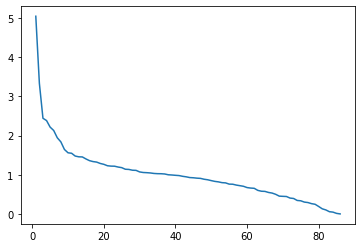

In [ ]:
sns.lineplot(range(1,1+pc.explained_variance_.shape[0]),pc.explained_variance_)
plt.show()

In [ ]:
pc=PCA(n_components=16)

In [ ]:
pc.fit(X)

PCA(n_components=16)

In [ ]:
x=pc.fit_transform(X)

In [ ]:
x

array([[ 1.73831897,  1.35543334,  4.71798759, ..., -0.4982457 ,
         0.30170067, -1.52702772],
       [ 0.77765229, -1.44123039,  2.0558043 , ...,  0.88905569,
         0.14945014,  0.56955287],
       [ 0.30787758, -2.84868498,  1.49644701, ..., -0.06565187,
        -1.48163526,  0.29946919],
       ...,
       [ 5.5676884 , -2.71286385, -1.26518144, ...,  1.90962773,
        -0.30108379,  0.61857239],
       [ 8.70143101, -0.25631071, -1.0292754 , ...,  1.23181692,
        -0.8139058 ,  2.02378804],
       [ 3.48691822,  3.03827426,  0.32311722, ...,  1.243945  ,
        -1.33115752,  0.16322864]])

In [ ]:
principalDf = pd.DataFrame(data = x, columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4',
                           'principal component 5','principal component 6','principal component 7','principal component 8','principal component 9',
                           'principal component 10','principal component 11','principal component 12','principal component 13','principal component 14',
                           'principal component 15','principal component 16'])
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14,principal component 15,principal component 16
0,1.738319,1.355433,4.717988,-0.606099,-0.532847,-1.142345,0.240692,0.163335,-1.270922,-0.788252,0.199259,-0.390919,1.179290,-0.498246,0.301701,-1.527028
1,0.777652,-1.441230,2.055804,-3.440611,1.777274,-0.663009,0.402178,-0.319863,0.166292,1.779445,-0.143890,-0.215937,-0.609567,0.889056,0.149450,0.569553
2,0.307878,-2.848685,1.496447,0.101323,0.627445,0.468361,-1.690852,-2.470678,1.777441,0.960941,-1.317962,-1.398302,2.146447,-0.065652,-1.481635,0.299469
3,0.292519,-0.710220,3.861836,-2.096745,1.231484,-1.196113,0.307829,-0.615896,-0.946720,-0.114501,-0.714122,0.786076,-0.086621,1.980090,-0.864739,0.678677
4,-1.814257,0.263004,2.261486,-0.502039,2.559030,-0.422261,2.041641,0.679711,1.542665,-1.129943,0.283908,-1.728816,0.514490,0.612573,1.343596,0.745223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,5.146925,2.285693,1.233763,5.017708,0.541936,-0.578021,-1.836163,-1.597180,-0.013824,0.212012,-2.386926,2.081292,-1.070929,-1.208495,-0.865365,-0.362736
723,6.988469,0.929076,-0.837556,2.853870,1.079149,0.047375,-1.968163,-1.566054,-0.264964,0.104032,-1.269564,1.119502,-0.756909,0.513266,-0.395216,0.878911
724,5.567688,-2.712864,-1.265181,2.240848,1.237001,0.557887,0.062056,-1.020880,1.970587,-0.078979,0.645578,-0.943791,-0.823431,1.909628,-0.301084,0.618572
725,8.701431,-0.256311,-1.029275,2.173344,1.279220,0.859368,-0.780157,1.945079,0.095815,-1.358871,-1.388090,-0.524314,0.571513,1.231817,-0.813906,2.023788


In [ ]:
x.shape

(727, 16)

**Decision Tree** 

In [ ]:
feature_cols = ['principal component 1', 'principal component 2','principal component 3','principal component 4',
                'principal component 5','principal component 6','principal component 7','principal component 8','principal component 9',
                'principal component 10','principal component 11','principal component 12','principal component 13','principal component 14',
                'principal component 15','principal component 16']
X = principalDf[feature_cols]
y= ewaste_data.WTP_for_Effective_Ewaste_Disposal_Yes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

In [ ]:
# Create a Decision Tree classifier object
clf = DecisionTreeClassifier()


In [ ]:
# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

In [ ]:
# Predict the reponse for test dataset
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1],
      dtype=uint8)

In [ ]:
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.5616438356164384


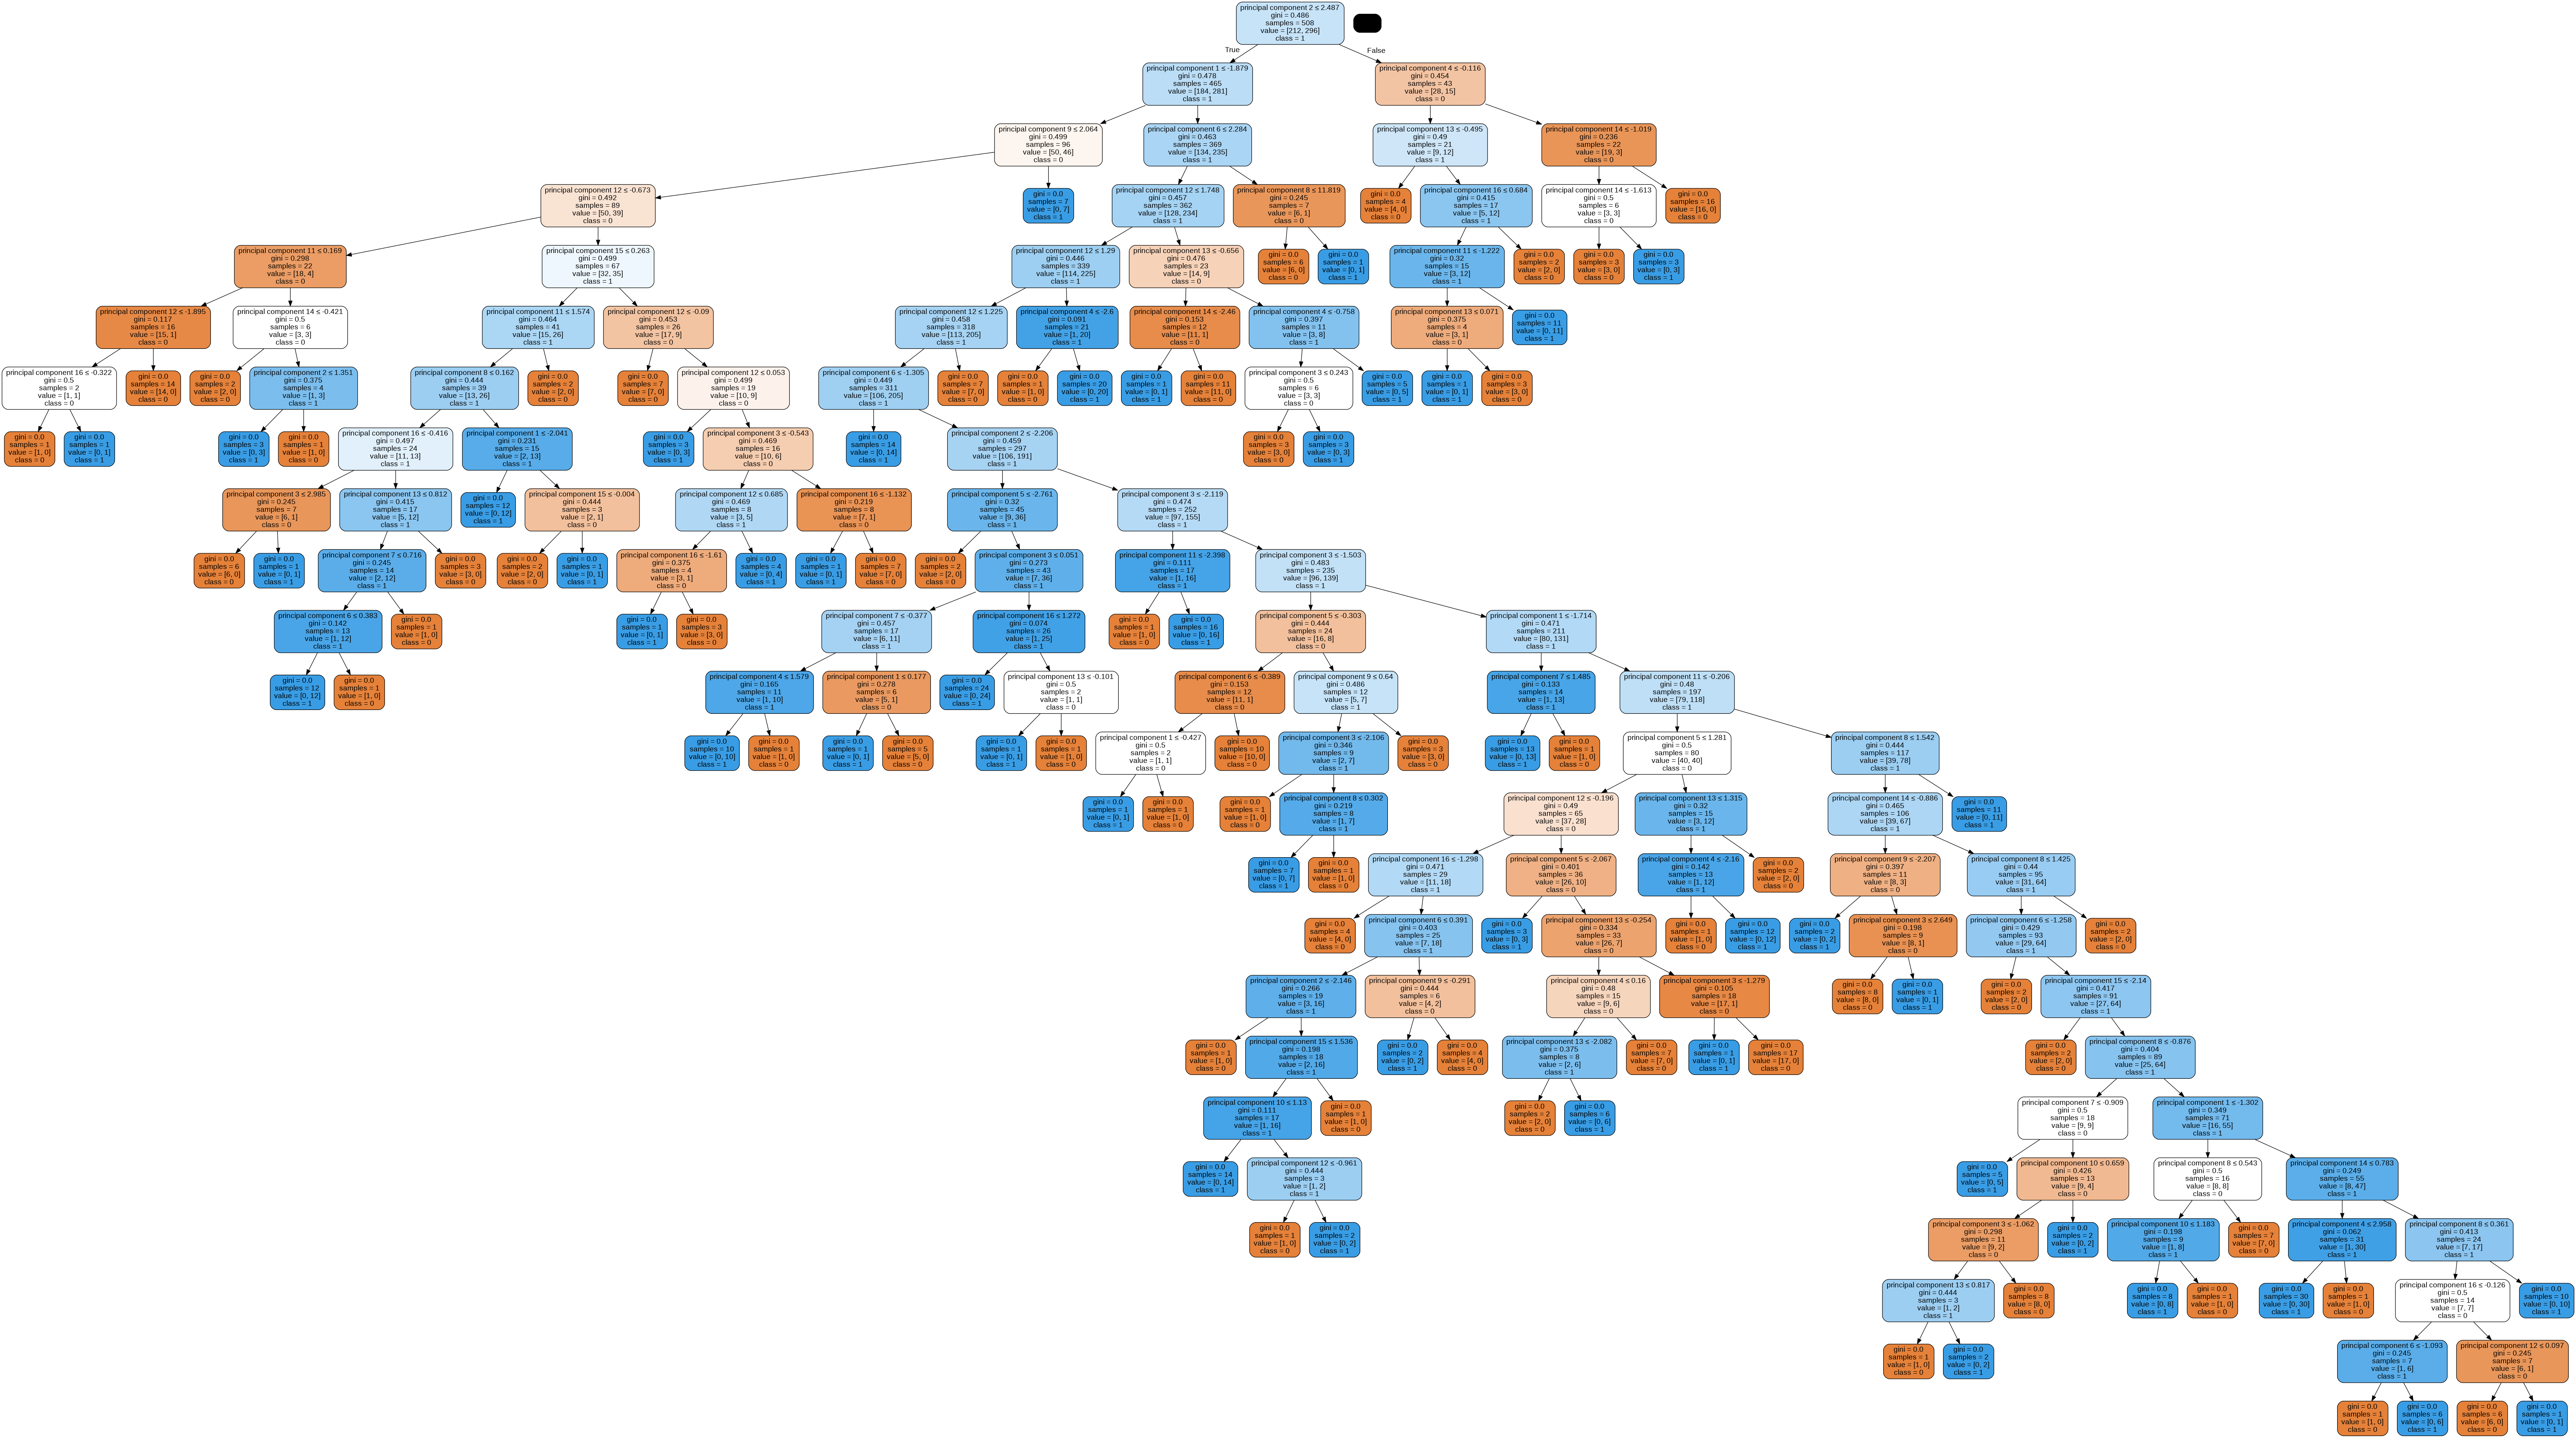

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled = True, rounded = True,
                special_characters = True, feature_names = feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())